# <font color=darkgreen> CNN_Dogs_Cats_Visualizing CAM-Data Augmentation-Pretrained models </font>

### Let us first prepare our dataset 
We split the dataset into 
1. Training images (1000 cat images and 1000 dog images)
2. Validation images (500 cat images and 500 dog images)
3. Test images (500 cat images and 500 dog images)

In [1]:
import os, shutil
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(tf.__version__)
print(tf.keras.__version__)

2.6.2
2.6.0


In [3]:
# os.listdir('../input/trained-models') # for Kaggle

In [4]:
os.listdir('../input/dogs-vs-cat-small/dogs_vs_cats_small') # for Kaggle

['val', 'test', 'train']

In [5]:
# original_dataset_dir = 'D:/Datasets/dogs_vs_cats_dataset' 
# Path to the original dataset
# base_dir = '../input/dogs-vs-cats-small/dogs_vs_cats_small' # for Kaggle
base_dir = '../input/dogs-vs-cat-small/dogs_vs_cats_small'
# os.mkdir(base_dir)

In [6]:
# Let us also make our train, val and test directories
train_dir = os.path.join(base_dir, 'train')
# print(train_dir)
# os.mkdir(train_dir)

val_dir = os.path.join(base_dir, 'val')
# os.mkdir(val_dir)

test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

In [7]:
# run a quick check
train_dir

'../input/dogs-vs-cat-small/dogs_vs_cats_small/train'

In [8]:
# Make separate train, val and test directories for cat images and dog images
# Use the same technique

train_cats_dir = os.path.join(train_dir, 'cats')
# os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
# os.mkdir(train_dogs_dir)

val_cats_dir = os.path.join(val_dir, 'cats')
# os.mkdir(val_cats_dir)
val_dogs_dir = os.path.join(val_dir, 'dogs')
# os.mkdir(val_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
# os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
# os.mkdir(test_dogs_dir)


In [9]:
len(os.listdir(train_cats_dir))

1000

In [10]:
# Let us cross check
print('Training Cat images ={}'.format(len(os.listdir(train_cats_dir))),
      '\nTraining Dog images ={}'.format(len(os.listdir(train_dogs_dir))),
      '\nValidation Cat images ={}'.format(len(os.listdir(val_cats_dir))),
      '\nValidation Dog images ={}'.format(len(os.listdir(val_dogs_dir))),
      '\nTesting Cat images ={}'.format(len(os.listdir(test_cats_dir))),
      '\nTesting Dog images ={}'.format(len(os.listdir(test_dogs_dir))),
     )

Training Cat images =1000 
Training Dog images =1000 
Validation Cat images =500 
Validation Dog images =500 
Testing Cat images =500 
Testing Dog images =500


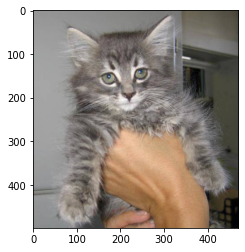

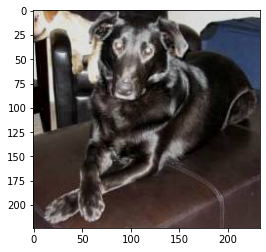

In [11]:
# View one image
import imageio
cat_image_names = os.listdir(train_cats_dir)
cat_img = imageio.imread(os.path.join(train_cats_dir, cat_image_names[5]))
plt.imshow(cat_img)

plt.figure()

dog_image_names = os.listdir(train_dogs_dir)
dog_img = imageio.imread(os.path.join(train_dogs_dir, dog_image_names[15]))
plt.imshow(dog_img)

### Build the CNN model

1. We need 4 Conv2D layers with 32, 64, 128, and 128 filters of sixe 3 x 3 each (neurons)
2. Alternating MaxPooling2D layers
3. One Flatten layer
4. Two Dense layers with 512 and 1 neurons each

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

2022-03-14 04:54:57.417878: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-14 04:54:57.521031: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-14 04:54:57.521724: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-14 04:54:57.522802: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [13]:
# Compiling the model
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
             loss='binary_crossentropy',
             metrics=['accuracy'])

### Read the images from the respective directories

We shall use ImageDataGenerator method

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary'
)

val_generator = test_datagen.flow_from_directory(
val_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
# Let us look at these outputs
for data_batch, labels_batch in train_generator:
    print('Data batch shape =', data_batch.shape)
    print('Labels batch shape =', labels_batch.shape)
    break

Data batch shape = (20, 150, 150, 3)
Labels batch shape = (20,)


### Training the model

In [16]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=10,
                             validation_data=val_generator,
                             validation_steps=50)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-03-14 04:55:01.125188: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-03-14 04:55:02.779449: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


100/100 [==============================] - 22s 156ms/step - loss: 0.6929 - accuracy: 0.5240 - val_loss: 0.6775 - val_accuracy: 0.6020
Epoch 2/10
100/100 [==============================] - 10s 99ms/step - loss: 0.6544 - accuracy: 0.6055 - val_loss: 0.6602 - val_accuracy: 0.5910
Epoch 3/10
100/100 [==============================] - 9s 92ms/step - loss: 0.6064 - accuracy: 0.6665 - val_loss: 0.6822 - val_accuracy: 0.6080
Epoch 4/10
100/100 [==============================] - 9s 93ms/step - loss: 0.5672 - accuracy: 0.7020 - val_loss: 0.6585 - val_accuracy: 0.6210
Epoch 5/10
100/100 [==============================] - 10s 98ms/step - loss: 0.5500 - accuracy: 0.7190 - val_loss: 0.6033 - val_accuracy: 0.6600
Epoch 6/10
100/100 [==============================] - 9s 95ms/step - loss: 0.5136 - accuracy: 0.7535 - val_loss: 0.5824 - val_accuracy: 0.6900
Epoch 7/10
100/100 [==============================] - 9s 95ms/step - loss: 0.4961 - accuracy: 0.7555 - val_loss: 0.5719 - val_accuracy: 0.6910
Epoch 

In [17]:
model.save('../working/cats_and_dogs_small_1.h5') # for Kaggle


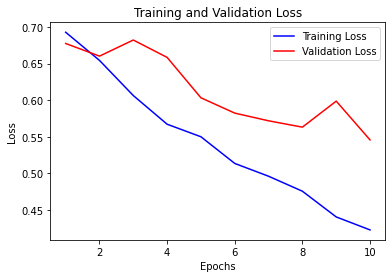

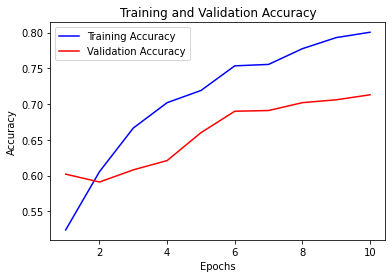

In [18]:
# Let us plot the loss and accuracy curves
history_dict = history.history
loss_value = history_dict['loss']
val_loss_value = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(loss_value) + 1)
plt.plot(epochs, loss_value, 'b', label='Training Loss')
plt.plot(epochs, val_loss_value, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# plt.savefig('../working/loss_plot.png')

plt.figure()

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# plt.savefig('../working/acc_plot.png')

### Let us evaluate our model on the test dataset

In [19]:
test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary'
)

test_loss, test_acc = model.evaluate(test_generator, steps=50)

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 5s 100ms/step - loss: 0.5627 - accuracy: 0.7110


In [20]:
print('The test accuracy is = ', np.round(test_acc, 4))

The test accuracy is =  0.711



Try retraining the model for 7 epochs and then 9 epochs and plot the Loss and Accuracy charts

Epoch 1/7
100/100 [==============================] - 10s 98ms/step - loss: 0.4001 - accuracy: 0.8175 - val_loss: 0.5532 - val_accuracy: 0.7300
Epoch 2/7
100/100 [==============================] - 9s 93ms/step - loss: 0.3693 - accuracy: 0.8365 - val_loss: 0.6150 - val_accuracy: 0.7040
Epoch 3/7
100/100 [==============================] - 9s 93ms/step - loss: 0.3503 - accuracy: 0.8480 - val_loss: 0.5653 - val_accuracy: 0.7240
Epoch 4/7
100/100 [==============================] - 10s 102ms/step - loss: 0.3284 - accuracy: 0.8660 - val_loss: 0.5547 - val_accuracy: 0.7330
Epoch 5/7
100/100 [==============================] - 9s 93ms/step - loss: 0.3114 - accuracy: 0.8745 - val_loss: 0.5653 - val_accuracy: 0.7230
Epoch 6/7
100/100 [==============================] - 9s 94ms/step - loss: 0.2835 - accuracy: 0.8910 - val_loss: 0.6726 - val_accuracy: 0.7160
Epoch 7/7
100/100 [==============================] - 10s 98ms/step - loss: 0.2563 - accuracy: 0.8990 - val_loss: 0.8108 - val_accuracy: 0.6900


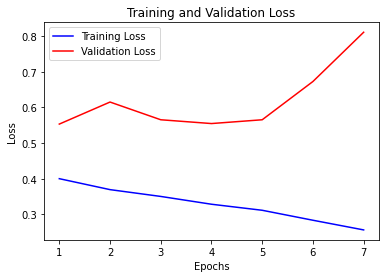

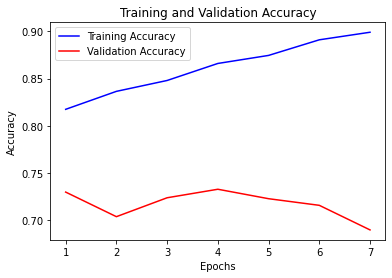

In [21]:
history1 = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=7,
                             validation_data=val_generator,
                             validation_steps=50)
# Let us plot the loss and accuracy curves
history_dict = history1.history
loss_value = history_dict['loss']
val_loss_value = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(loss_value) + 1)
plt.plot(epochs, loss_value, 'b', label='Training Loss')
plt.plot(epochs, val_loss_value, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# plt.savefig('../working/loss_plot.png')

plt.figure()

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# plt.savefig('../working/acc_plot.png')

Epoch 1/9
100/100 [==============================] - 10s 98ms/step - loss: 0.2365 - accuracy: 0.9105 - val_loss: 0.6264 - val_accuracy: 0.7320
Epoch 2/9
100/100 [==============================] - 9s 91ms/step - loss: 0.2189 - accuracy: 0.9190 - val_loss: 0.6360 - val_accuracy: 0.7320
Epoch 3/9
100/100 [==============================] - 9s 93ms/step - loss: 0.1977 - accuracy: 0.9240 - val_loss: 0.6062 - val_accuracy: 0.7520
Epoch 4/9
100/100 [==============================] - 10s 103ms/step - loss: 0.1767 - accuracy: 0.9385 - val_loss: 0.6588 - val_accuracy: 0.7400
Epoch 5/9
100/100 [==============================] - 10s 101ms/step - loss: 0.1563 - accuracy: 0.9490 - val_loss: 0.6455 - val_accuracy: 0.7420
Epoch 6/9
100/100 [==============================] - 10s 96ms/step - loss: 0.1364 - accuracy: 0.9555 - val_loss: 0.7071 - val_accuracy: 0.7300
Epoch 7/9
100/100 [==============================] - 10s 103ms/step - loss: 0.1257 - accuracy: 0.9595 - val_loss: 0.6884 - val_accuracy: 0.748

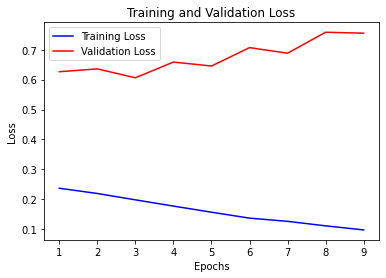

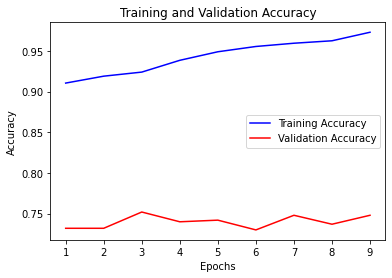

In [22]:
history2 = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=9,
                             validation_data=val_generator,
                             validation_steps=50)
# Let us plot the loss and accuracy curves
history_dict = history2.history
loss_value = history_dict['loss']
val_loss_value = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(loss_value) + 1)
plt.plot(epochs, loss_value, 'b', label='Training Loss')
plt.plot(epochs, val_loss_value, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# plt.savefig('../working/loss_plot.png')

plt.figure()

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# plt.savefig('../working/acc_plot.png')

# <font color=deeppink> Using Data Augmentation </font>

You need the Accelerator to be enabled (GPU) for executing this code segment.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/15
100/100 [==============================] - 19s 184ms/step - loss: 0.6934 - accuracy: 0.5140 - val_loss: 0.6859 - val_accuracy: 0.5720
Epoch 2/15
100/100 [==============================] - 18s 184ms/step - loss: 0.6876 - accuracy: 0.5455 - val_loss: 0.6722 - val_accuracy: 0.5820
Epoch 3/15
100/100 [==============================] - 18s 179ms/step - loss: 0.6797 - accuracy: 0.5820 - val_loss: 0.6553 - val_accuracy: 0.6270
Epoch 4/15
100/100 [==============================] - 19s 190ms/step - loss: 0.6591 - accuracy: 0.6035 - val_loss: 0.6357 - val_accuracy: 0.6430
Epoch 5/15
100/100 [==============================] - 18s 179ms/step - loss: 0.6495 - accuracy: 0.6420 - val_loss: 0.6391 - val_accuracy: 0.6200
Epoch 6/15
100/100 [==============================] - 18s 184ms/step - loss: 0.6316 - accuracy: 0.6485 - val_loss: 0.5955 - val_accuracy: 0.6790
Epoch 7/15
100/100 [==============================] - 19s 185ms/step - loss: 0.6194 - accuracy: 0.6550 - val_loss: 0.6031 - val_ac

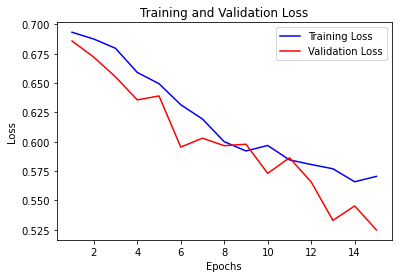

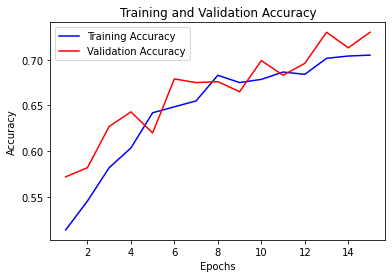

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 3s 67ms/step - loss: 0.5667 - accuracy: 0.7240
The test accuracy is =  0.724


In [23]:
# # Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])
model.summary()

# # Compiling the model
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
             loss='binary_crossentropy',
             metrics=['accuracy'])

# # Extracting the Data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Using Data augmentation for the training dataset
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest') # required when scaling and translating the image

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary'
                                                   )

val_generator = test_datagen.flow_from_directory(val_dir,
                                                 target_size=(150, 150),
                                                 batch_size=20,
                                                 class_mode='binary'
                                                )
# Training the model                                                
history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=15,
                    validation_data=val_generator,
                    validation_steps=50)
# model.save('../working/cats_and_dogs_small_2.h5') # for Kaggle


# Let us plot the loss and accuracy curves
history_dict = history.history
loss_value = history_dict['loss']
val_loss_value = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(loss_value) + 1)
plt.plot(epochs, loss_value, 'b', label='Training Loss')
plt.plot(epochs, val_loss_value, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# plt.savefig('../working/loss_plot.png')

plt.figure()

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# plt.savefig('../working/acc_plot.png')

# Evaluating our model
test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary'
)

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('The test accuracy is = ', np.round(test_acc, 4))

In [24]:
# Alternatively for the latest version of keras try the following:
# from tensorflow.keras.utils import image_dataset_from_directory

# train_dataset = image_dataset_from_directory(
#     new_base_dir / "train",
#     image_size=(150, 150),
#     batch_size=20)

# validation_dataset = image_dataset_from_directory(
#     new_base_dir / "validation",
#     image_size=(150, 150),
#     batch_size=20)

# test_dataset = image_dataset_from_directory(
#     new_base_dir / "test",
#     image_size=(150, 150),
#     batch_size=20)

# for data_batch, labels_batch in train_dataset:
#     print('Data batch shape =', data_batch.shape)
#     print('Labels batch shape =', labels_batch.shape)
#     break

# data_augmentation = keras.Sequential([
#         layers.RandomFlip("horizontal"),
#         layers.RandomRotation(0.1),
#         layers.RandomZoom(0.2),
#     ])

# plt.figure(figsize=(10, 10)) 
# for images, _ in train_dataset.take(1): 
#     for i in range(9):
#         augmented_images = data_augmentation(images) 
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(augmented_images[0].numpy().astype("uint8")) 
#         plt.axis("off")



# Model building
# inputs = keras.Input(shape=(150, 150, 3))
# x = data_augmentation(inputs)
# x = layers.Rescaling(1./255)(x)
# x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
# x = layers.MaxPooling2D(pool_size=2)(x)
# x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
# x = layers.MaxPooling2D(pool_size=2)(x)
# x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
# x = layers.MaxPooling2D(pool_size=2)(x)
# x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
# x = layers.Flatten()(x)
# x = layers.Dropout(0.5)(x)
# x = layers.Dense(512, activation='relu')
# outputs = layers.Dense(1, activation="sigmoid")(x)
# model = keras.Model(inputs=inputs, outputs=outputs)

# Compiling the model
# model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
#              loss='binary_crossentropy',
#              metrics=['accuracy'])

# Training the model                                                
# history = model.fit(
#     train_dataset,
#     epochs=100,
#     validation_data=validation_dataset)
# model.save('../working/cats_and_dogs_small_data_aug.h5') # for Kaggle
# model.save('path_name/cats_and_dogs_small_data_aug.h5')

# Evaluating the model
# test_loss, test_acc = model.evaluate(test_dataset)
# print(f"Test accuracy: {test_acc:.3f}")

# <font color=deeppink> Using Pre-trained models </font>

You need the Internet enabled in Kaggle to execute this code segment

# <font color = "deeppink"> VGG16</font>

In [25]:
from tensorflow.keras.applications import VGG16 # Later, try with Xception and ResNet50

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150, 150, 3))

# Alternatively, if you do not execute the import statement above
# conv_base = tf.keras.applications.vgg16.VGG16(
#     weights='imagenet',
#     include_top=False,
#     input_shape=(150, 150, 3))

conv_base.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/15
100/100 [==============================] - 15s 126ms/step - loss: 0.6728 - accuracy: 0.6135 - val_loss: 0.4471 - val_accuracy: 0.7930
Epoch 2/15


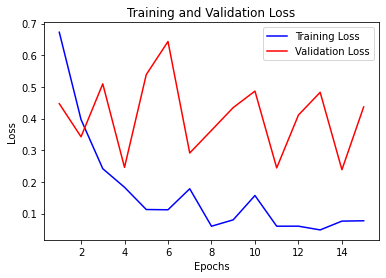

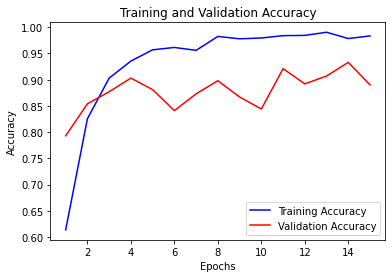

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 3s 68ms/step - loss: 0.4496 - accuracy: 0.8850
The test accuracy is =  0.885


In [26]:
# Building the model
model = tf.keras.models.Sequential([
    conv_base,
    tf.keras.layers.Flatten(), # Later, try adding a Dropout layer
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

# Compiling the model
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
             loss='binary_crossentropy',
             metrics=['accuracy'])

# Extracting the Data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Using Data augmentation for the training dataset
train_datagen = ImageDataGenerator(rescale=1./255,
#                                   rotation_range=40,
#                                   width_shift_range=0.2,
#                                   height_shift_range=0.2,
#                                   shear_range=0.2,
#                                   zoom_range=0.2,
#                                   horizontal_flip=True,
#                                   fill_mode='nearest' # required when scaling and translating the image
                                  )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary'
                                                   )

val_generator = test_datagen.flow_from_directory(val_dir,
                                                 target_size=(150, 150),
                                                 batch_size=20,
                                                 class_mode='binary'
                                                )

conv_base.trainable = False # We don't want to re-train the pre-trained weights

# Training the model                                                
history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=15,
                    validation_data=val_generator,
                    validation_steps=50)
# model.save('../working/cats_and_dogs_small_3.h5')  # for Kaggle


# Let us plot the loss and accuracy curves
history_dict = history.history
loss_value = history_dict['loss']
val_loss_value = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(loss_value) + 1)
plt.plot(epochs, loss_value, 'b', label='Training Loss')
plt.plot(epochs, val_loss_value, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# plt.savefig('../working/loss_plot.png') # for Kaggle

plt.figure()

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# plt.savefig('../working/acc_plot.png')  # for Kaggle

# Evaluating our model
test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary'
)

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('The test accuracy is = ', np.round(test_acc, 4))

In [27]:
## For the latest version of keras
# import numpy as np

## For preprocessing the dataset
# def get_features_and_labels(dataset):
#     all_features = []
#     all_labels = []
#     for images, labels in dataset:
#         preprocessed_images = keras.applications.vgg16.preprocess_input(images)
#         features = conv_base.predict(preprocessed_images)
#         all_features.append(features)
#         all_labels.append(labels)
#     return np.concatenate(all_features), np.concatenate(all_labels)
    
# train_features, train_labels = get_features_and_labels(train_dataset)
# val_features, val_labels = get_features_and_labels(validation_dataset)
# test_features, test_labels = get_features_and_labels(test_dataset)

## Building the model
# inputs = keras.Input(shape=(4, 4, 512)) # note the shape of the last layer
# x = layers.Flatten()(inputs) 
# x = layers.Dense(256)(x)
# x = layers.Dropout(0.5)(x)
# outputs = layers.Dense(1, activation="sigmoid")(x)
# model = keras.Model(inputs, outputs)

## Compiling the model 
# model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
#              loss='binary_crossentropy',
#              metrics=['accuracy'])

## Training the model
# history = model.fit(
#     train_features, train_labels,
#     epochs=20,
#     validation_data=(val_features, val_labels))

# model.save('../working/cats_and_dogs_small_vgg16.h5') # for Kaggle
# model.save('path_name/cats_and_dogs_small_vgg16.h5')

#### A slight modification where we allow the 'block5' to be trained on our problem statement

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/15
100/100 [==============================] - 20s 191ms/step - loss: 0.3761 - accuracy: 0.8235 - val_loss: 0.2335 - val_accuracy: 0.9030
Epo

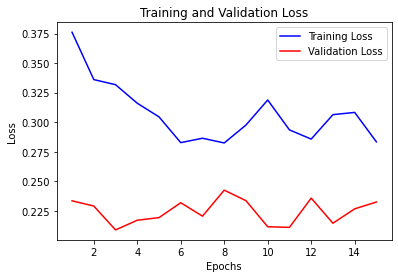

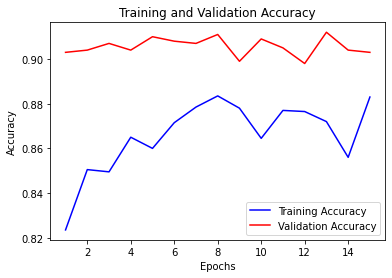

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 4s 82ms/step - loss: 0.2562 - accuracy: 0.8970
The test accuracy is =  0.897


In [28]:
# Building the model
model = tf.keras.models.Sequential([
    conv_base,
    tf.keras.layers.Flatten(), # Later, try adding a Dropout layer
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

# Compiling the model
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
             loss='binary_crossentropy',
             metrics=['accuracy'])

# Extracting the Data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Using Data augmentation for the training dataset
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest') # required when scaling and translating the image

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary'
                                                   )

val_generator = test_datagen.flow_from_directory(val_dir,
                                                 target_size=(150, 150),
                                                 batch_size=20,
                                                 class_mode='binary'
                                                )

conv_base.trainable = True

set_trainable = False # A constant
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable: # This is set separately so that the subsequent Conv layers also get trained
        layer.trainable = True
    else:
        layer.trainable = False

# Training the model                                                
history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=15,
                    validation_data=val_generator,
                    validation_steps=50)
# model.save('../working/cats_and_dogs_small_3.h5')

# Let us plot the loss and accuracy curves
history_dict = history.history
loss_value = history_dict['loss']
val_loss_value = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(loss_value) + 1)
plt.plot(epochs, loss_value, 'b', label='Training Loss')
plt.plot(epochs, val_loss_value, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# plt.savefig('../working/loss_plot.png')

plt.figure()

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# plt.savefig('../working/acc_plot.png')

# Evaluating our model
test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary'
)

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('The test accuracy is = ', np.round(test_acc, 4))

# <font color=darkgreen> Visualizing Intermediate Activations </font>

In [29]:
from tensorflow import keras
model = keras.models.load_model('../input/cats-and-dogs-small-2/cats_and_dogs_small_2.h5')
#     'D:/SCIT/MBA-DSDA/Semester-II/Deep Learning-2123/\
# Code Files/Output/cats_and_dogs_small_2.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [30]:
import numpy as np

img_path = keras.utils.get_file(
fname='cat.jpg',
origin='https://img-datasets.s3.amazonaws.com/cat.jpg')

90112/80329 [=================================] - 0s 1us/step


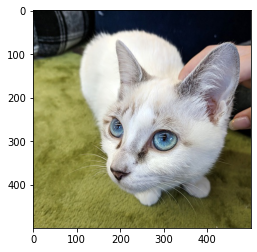

In [31]:
img_path 
plt.imshow(np.array(imageio.imread(img_path)))

(500, 500, 3)
(150, 150, 3)
(1, 150, 150, 3)


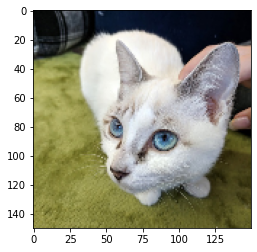

In [32]:
## For  the latest version of keras
# def get_img_array(img_path, target_size):
#     img = keras.utils.load_img(img_path, target_size=target_size)
#     array = keras.utils.img_to_array(img)
#     print(array.shape)
#     array = np.expand_dims(array, axis=0) # convert into a batch of single sample
#     print(array.shape)
#     return

# img_tensor = get_img_array(img_path, target_size=(150, 150)) # ensure to cross check this with your model
import cv2
# For lower versions of keras
def get_img_array(img_path, target_size):
    img = np.array(imageio.imread(img_path))
    print(img.shape)
    img = cv2.resize(img, target_size)
    print(img.shape)
    plt.imshow(img)
    array = np.expand_dims(img, axis=0) # convert into a batch of single sample
    print(array.shape)
    return array

img_tensor = get_img_array(img_path, target_size=(150, 150)) # ensure to cross check this with your model
plt.imshow(img_tensor[0])

In [33]:
model.input  # provides the shape of the input

<KerasTensor: shape=(None, 150, 150, 3) dtype=float32 (created by layer 'conv2d_8_input')>

In [34]:
from tensorflow.keras import layers

layer_outputs = []
layer_names = []
for layer in model.layers:
    if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D)):
        layer_outputs.append(layer.output)
        layer_names.append(layer.name)

# print(layer_names)
# print(layer_outputs)        
activation_model = keras.Model(inputs=model.input, outputs=layer_outputs)

In [35]:
print(layer_names)
print(layer_outputs)

['conv2d_8', 'max_pooling2d_8', 'conv2d_9', 'max_pooling2d_9', 'conv2d_10', 'max_pooling2d_10', 'conv2d_11', 'max_pooling2d_11']
[<KerasTensor: shape=(None, 148, 148, 32) dtype=float32 (created by layer 'conv2d_8')>, <KerasTensor: shape=(None, 74, 74, 32) dtype=float32 (created by layer 'max_pooling2d_8')>, <KerasTensor: shape=(None, 72, 72, 64) dtype=float32 (created by layer 'conv2d_9')>, <KerasTensor: shape=(None, 36, 36, 64) dtype=float32 (created by layer 'max_pooling2d_9')>, <KerasTensor: shape=(None, 34, 34, 128) dtype=float32 (created by layer 'conv2d_10')>, <KerasTensor: shape=(None, 17, 17, 128) dtype=float32 (created by layer 'max_pooling2d_10')>, <KerasTensor: shape=(None, 15, 15, 128) dtype=float32 (created by layer 'conv2d_11')>, <KerasTensor: shape=(None, 7, 7, 128) dtype=float32 (created by layer 'max_pooling2d_11')>]


In [36]:
activations = activation_model.predict(img_tensor)

In [37]:
print('---First Layer Activations(32)---')
first_layer_activation = activations[0]
print(first_layer_activation.shape)

print('---Second Layer Activations(64)---')
second_layer_activation = activations[1]
print(second_layer_activation.shape)

print('---Third Layer Activations(128)---')
third_layer_activation = activations[2]
print(third_layer_activation.shape)

# Repeat the same for the second and third layer activations

---First Layer Activations(32)---
(1, 148, 148, 32)
---Second Layer Activations(64)---
(1, 74, 74, 32)
---Third Layer Activations(128)---
(1, 72, 72, 64)


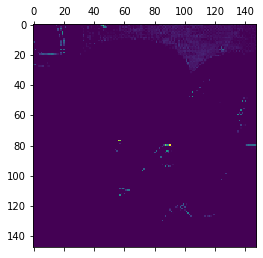

In [38]:
# Show the 2nd channel activation from the 1st layer
plt.matshow(first_layer_activation[0, :, :, 1], cmap='viridis')


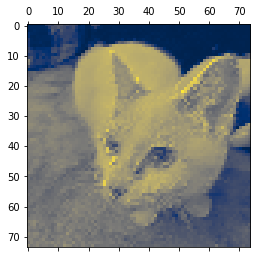

In [39]:
# Show the 32nd channel activation from the 2nd layer
plt.matshow(second_layer_activation[0, :,:, 31], cmap='cividis')

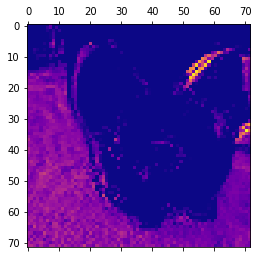

In [40]:
# Show the 40th channel activation from the 3rd layer
plt.matshow(activations[2][0,:,:,39], cmap='plasma')

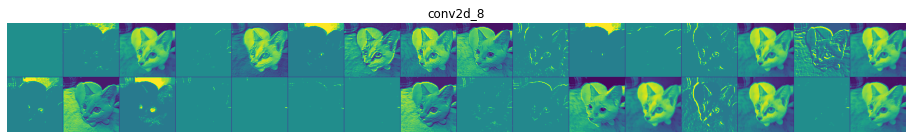

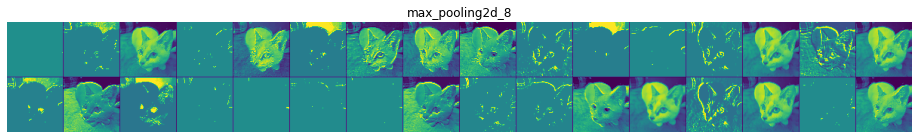

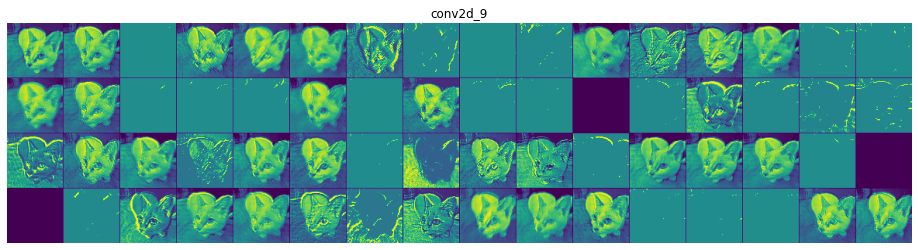

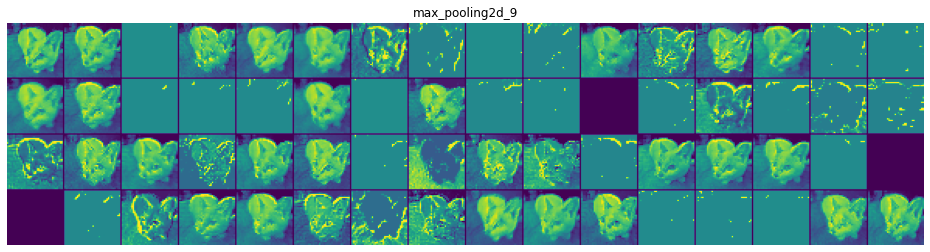

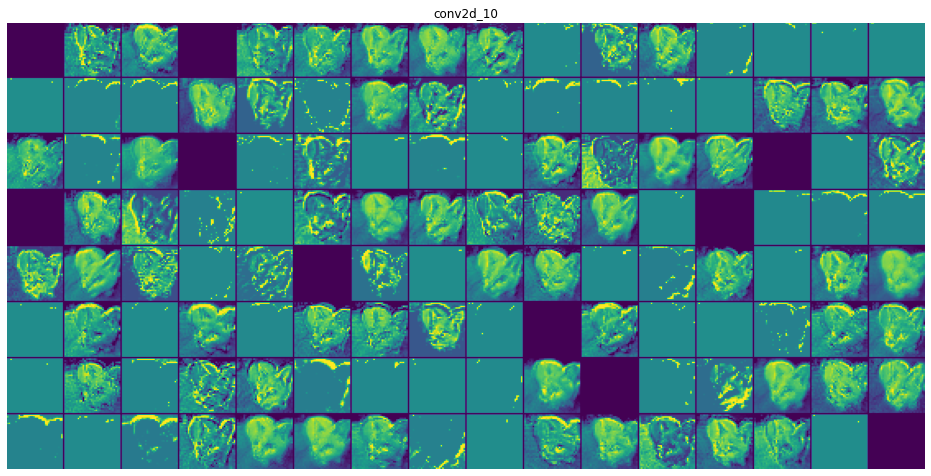

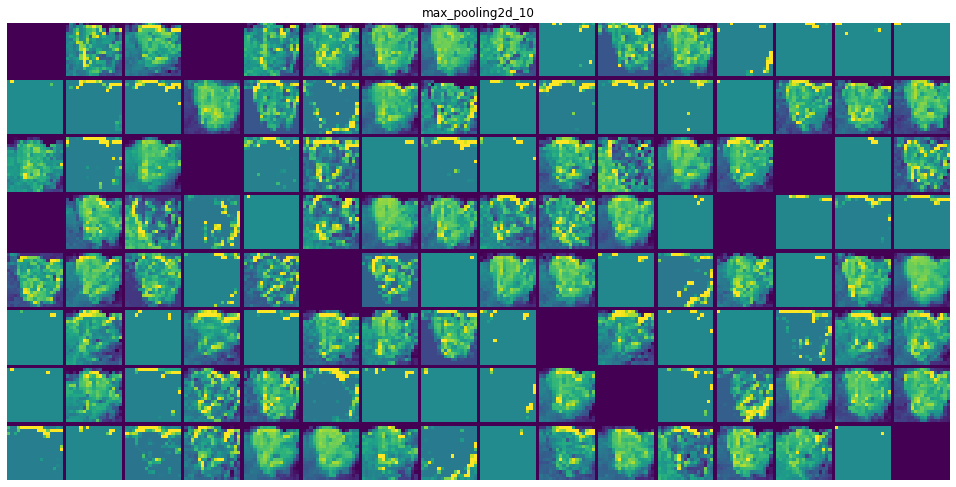

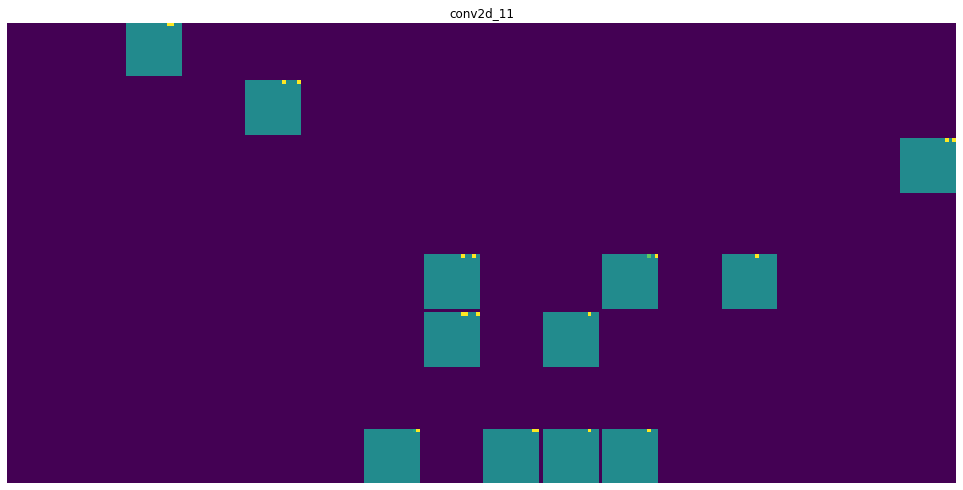

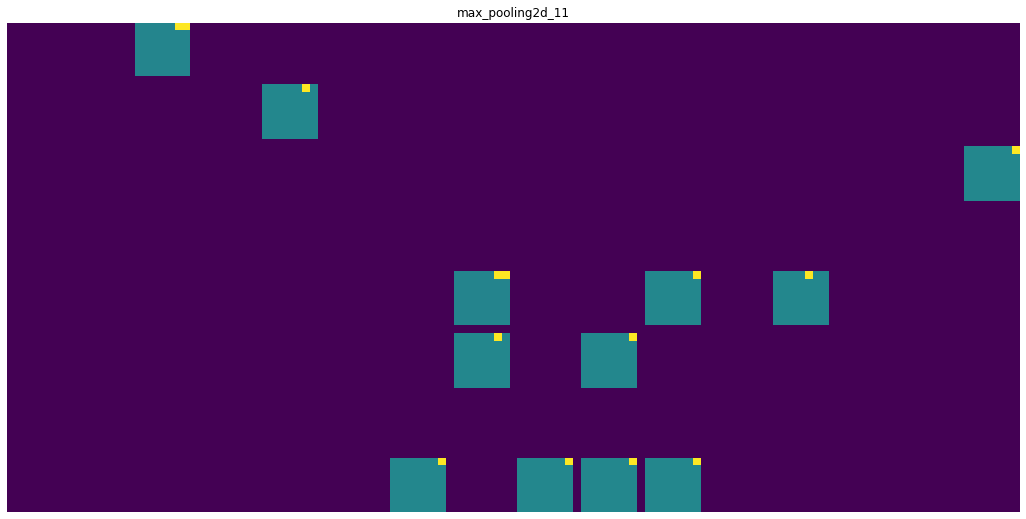

In [41]:
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros(((size + 1) * n_cols - 1, 
                             images_per_row * (size + 1) - 1))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_index = col * images_per_row + row
            channel_image = layer_activation[0, :, :, channel_index].copy()
            if channel_image.sum() != 0:
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype("uint8")
            display_grid[
                col * (size + 1): (col + 1) * size + col,
                row * (size + 1): (row + 1) * size + row
            ] = channel_image
            
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                   scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.axis("off")
    plt.imshow(display_grid, aspect="auto", cmap="viridis")

# Using Pre-trained networks to predict the labels and visualizing the convnet activations using GRAD-CAM
- We basically try to display the visual patterns that each filter in the convnet is meant to respond to using a technique called as Gradient based class activation mapping (Selvaraju et al., 2017)
- We use the technique of Gradient Ascent to maximize the response of the filter.
- We are using a pre-trained model named "Xception" (Chollet, 2017) using Separable Conv layers

In [42]:
model_x = keras.applications.xception.Xception(
weights='imagenet',
include_top=False)  # this suggests including the final classification layer
# irrelevant in this case since, we are looking for a binary classification
# the Xception model trained on the imagenet dataset is a multi-class classification problem

83697664/83683744 [==============================] - 0s 0us/step


In [43]:
for layer in model_x.layers:
    if isinstance(layer, (keras.layers.Conv2D, keras.layers.SeparableConv2D)):
        print(layer.name)

block1_conv1
block1_conv2
block2_sepconv1
block2_sepconv2
conv2d_8
block3_sepconv1
block3_sepconv2
conv2d_9
block4_sepconv1
block4_sepconv2
conv2d_10
block5_sepconv1
block5_sepconv2
block5_sepconv3
block6_sepconv1
block6_sepconv2
block6_sepconv3
block7_sepconv1
block7_sepconv2
block7_sepconv3
block8_sepconv1
block8_sepconv2
block8_sepconv3
block9_sepconv1
block9_sepconv2
block9_sepconv3
block10_sepconv1
block10_sepconv2
block10_sepconv3
block11_sepconv1
block11_sepconv2
block11_sepconv3
block12_sepconv1
block12_sepconv2
block12_sepconv3
block13_sepconv1
block13_sepconv2
conv2d_11
block14_sepconv1
block14_sepconv2


In [44]:
# Creating a feature extractor model
layer_name = "block3_sepconv1"
layer = model_x.get_layer(name=layer_name)
print(layer)
# We shall create a Functional API model
feature_extractor = keras.Model(inputs=model_x.input, outputs=layer.output)

In [45]:
activation = feature_extractor(
keras.applications.xception.preprocess_input(img_tensor))

In [46]:
import tensorflow as tf

def compute_loss(image, filter_index):
    activation = feature_extractor(image)
    filter_activation = activation[0, :, :, filter_index]
    return tf.reduce_mean(filter_activation)

The difference between model(x) and model.predict(x) is that the former happens in-memory and retrieves the values of the gradient. The latter however only predicts the output value.



In [47]:
# Loss maximizatiokn via stochastic gradient ascent
@tf.function
def gradient_ascent_step(image, filter_index, learning_rate):
    with tf.GradientTape() as tape:
        tape.watch(image)
        loss = compute_loss(image, filter_index)
    grads = tape.gradient(loss, image) # how much is the image activating the filter
    grads = tf.math.l2_normalize(grads) # normalixe the gradients
    image += learning_rate * grads # move the image in the direction that activates our target filter more strongly
    return image

In [48]:
img_width = 200
img_height = 200

def generate_filter_pattern(filter_index):
    iterations = 30
    learning_rate = 10.
    image = tf.random.uniform(
    minval=0.4,
    maxval=0.6,
    shape=(1, img_width, img_height, 3  ))

    for i in range (iterations):
        image = gradient_ascent_step(image, filter_index, learning_rate)
    return image[0].numpy()

In [49]:
def deprocess_image(image):
    image -= image.mean()
    image /= image.std()
    image *= 64
    image += 128
    image = np.clip(image, 0, 255).astype("uint8")
    image = image[25:-25, 25:-25, :]
    return image

In [50]:
# Execute the following code to see what happens with the tf.random.uniform fucntion
image = tf.random.uniform(
    minval=0.4,
    maxval=0.6,
    shape=(1, 200, 200, 3  ))
print(image[:5, :5, 0])

tf.Tensor(
[[[0.4480412  0.41409704 0.50244987]
  [0.58628297 0.50860894 0.414947  ]
  [0.59245473 0.5373926  0.4850277 ]
  [0.46455532 0.4130548  0.56261575]
  [0.5943998  0.5068033  0.5107422 ]]], shape=(1, 5, 3), dtype=float32)


In [51]:
# Execute the following code to see what happens with the deprocess_image function
image -= np.mean(image)
print(image[:5, :5, 0])
image /= np.std(image)
print(image[:5, :5, 0])
image *= 64
print(image[:5, :5, 0])
image += 128
print(image[:5, :5, 0])
image = np.clip(image, 0, 255).astype("uint8")
print(image[:5, :5, 0])
image[25:-25, 25:-25, :]

tf.Tensor(
[[[-0.05190185 -0.08584601  0.00250682]
  [ 0.08633992  0.00866589 -0.08499604]
  [ 0.09251168  0.03744957 -0.01491535]
  [-0.03538772 -0.08688825  0.0626727 ]
  [ 0.09445676  0.00686023  0.01079914]]], shape=(1, 5, 3), dtype=float32)
tf.Tensor(
[[[-0.89793855 -1.4851965   0.04336979]
  [ 1.4937415   0.14992599 -1.4704915 ]
  [ 1.6005174   0.6479039  -0.25804603]
  [-0.61223257 -1.5032281   1.0842819 ]
  [ 1.6341686   0.11868675  0.18683273]]], shape=(1, 5, 3), dtype=float32)
tf.Tensor(
[[[-57.468067  -95.052574    2.7756667]
  [ 95.59946     9.5952635 -94.11146  ]
  [102.43311    41.46585   -16.514946 ]
  [-39.182884  -96.2066     69.39404  ]
  [104.58679     7.595952   11.957294 ]]], shape=(1, 5, 3), dtype=float32)
tf.Tensor(
[[[ 70.53194   32.947426 130.77567 ]
  [223.59946  137.59526   33.888542]
  [230.4331   169.46585  111.485054]
  [ 88.817116  31.793404 197.39404 ]
  [232.58679  135.59595  139.95729 ]]], shape=(1, 5, 3), dtype=float32)
[[[ 70  32 130]
  [223 137  33]

array([], shape=(0, 150, 200, 3), dtype=uint8)

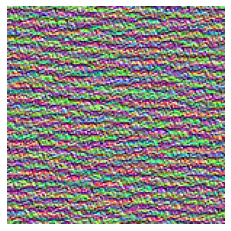

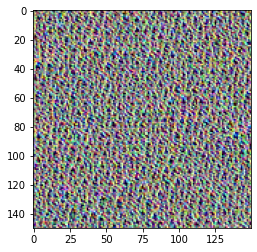

In [52]:
plt.axis("off")
plt.imshow(deprocess_image(generate_filter_pattern(filter_index=2)))

plt.figure()
plt.imshow(deprocess_image(generate_filter_pattern(filter_index=12)))

# Try it for other filter indexes too

In [53]:
# Generating a grid of all filter responses
all_images = []
for filter_index in range(64):
    print(f"Processing filter {filter_index}")
    image = deprocess_image(generate_filter_pattern(filter_index))
    all_images.append(image)

Processing filter 0
Processing filter 1
Processing filter 2
Processing filter 3
Processing filter 4
Processing filter 5
Processing filter 6
Processing filter 7
Processing filter 8
Processing filter 9
Processing filter 10
Processing filter 11
Processing filter 12
Processing filter 13
Processing filter 14
Processing filter 15
Processing filter 16
Processing filter 17
Processing filter 18
Processing filter 19
Processing filter 20
Processing filter 21
Processing filter 22
Processing filter 23
Processing filter 24
Processing filter 25
Processing filter 26
Processing filter 27
Processing filter 28
Processing filter 29
Processing filter 30
Processing filter 31
Processing filter 32
Processing filter 33
Processing filter 34
Processing filter 35
Processing filter 36
Processing filter 37
Processing filter 38
Processing filter 39
Processing filter 40
Processing filter 41
Processing filter 42
Processing filter 43
Processing filter 44
Processing filter 45
Processing filter 46
Processing filter 47
Pr

In [54]:
margin = 5
n = 8
cropped_width = img_width - 25 * 2
cropped_height = img_height - 25 * 2
width = n * cropped_width + (n - 1) * margin
height = n * cropped_height + (n - 1) * margin
stitched_filters = np.zeros((width, height, 3))

for i in range(n):
    for j in range(n):
        image = all_images[i * n + j]
#         stitched_filters[
        row_start = (cropped_width + margin) * i
        row_end = (cropped_width + margin) * i + cropped_width  # replace width by height everywhere
        column_start = (cropped_height + margin) * j 
        column_end = (cropped_height + margin) * j + cropped_height
        stitched_filters[
                row_start: row_end,
                column_start: column_end, :] = image
   

## <font color=deeppink>Visualizing Heatmaps of class activations</font>

In [55]:
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '../input/elephant/elephant1.jpg'

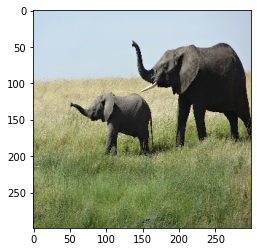

In [56]:
img1 = image.load_img(img_path, target_size=(299, 299))
plt.imshow(img1)

x = image.img_to_array(img1)
x = np.expand_dims(x, axis=0)

img_tensor1 = tf.keras.applications.xception.preprocess_input(x)

# <font color=deeppink>Xception</font>

In [57]:
model_x1 = tf.keras.applications.xception.Xception(weights='imagenet')

91897856/91884032 [==============================] - 1s 0us/step


In [58]:
preds = model_x1.predict(img_tensor1)
preds.shape

(1, 1000)

In [59]:
print(tf.keras.applications.xception.decode_predictions(preds, top=5)[0])

49152/35363 [=========================================] - 0s 0us/step
[('n02504458', 'African_elephant', 0.90922254), ('n01871265', 'tusker', 0.05263644), ('n02504013', 'Indian_elephant', 0.003505492), ('n03623198', 'knee_pad', 0.00023959893), ('n02391049', 'zebra', 0.0002060168)]


In [60]:
np.argmax(preds[0])

386

In [61]:
#  Setting up a model returning the last convolutional output
last_conv_layer_name = "block14_sepconv2_act"
classifier_layer_names = [
    "avg_pool",
    "predictions"
]
last_conv_layer = model_x1.get_layer(last_conv_layer_name)
last_conv_layer_model = keras.Model(model_x1.inputs, last_conv_layer.output)

In [62]:
classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
x = classifier_input
for layer_name in classifier_layer_names:
    x = model_x1.get_layer(layer_name)(x)
classifier_model = keras.Model(classifier_input, x)

In [63]:
with tf.GradientTape() as tape:
    last_conv_layer_output = last_conv_layer_model(img_tensor1)
    tape.watch(last_conv_layer_output)
    preds = classifier_model(last_conv_layer_output)
    top_pred_index = tf.argmax(preds[0])
    top_class_channel = preds[:, top_pred_index]
    
grads = tape.gradient(top_class_channel, last_conv_layer_output)

In [64]:
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2)).numpy()
last_conv_layer_output = np.array(last_conv_layer_output[0])
for i in range(pooled_grads.shape[-1]):
    last_conv_layer_output[:, :, i] *= pooled_grads[i]
heatmap = np.mean(last_conv_layer_output, axis=-1)

In [65]:
last_conv_layer_output.shape

(10, 10, 2048)

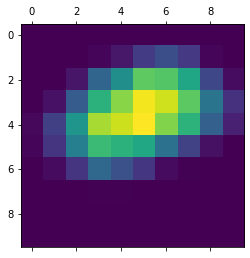

In [66]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

# Observe the region that has the brightest pixels (yellow)
# This indicates the maximum activation is caused by that pattern

###  Superimposing the heatmap on the original picture

In [67]:
save_path = "../input/elephant/elephant1.jpg"

In [68]:
import matplotlib.cm as cm
heatmap = np.uint8(255 * heatmap)

In [69]:
import cv2
img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
print(heatmap.shape)
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print(heatmap.shape)
superimposed_img = heatmap * 0.4 + img
cv2.imwrite(save_path, superimposed_img)
# imageio.imwrite(save_path, superimposed_img)

(600, 899)
(600, 899, 3)


False